In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle competitions download -c classifying-customers-into-segments

100% 104k/104k [00:00<00:00, 282kB/s]
100% 104k/104k [00:00<00:00, 282kB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!unzip -qq classifying-customers-into-segments.zip


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

import os

In [6]:
df = pd.read_csv('Train.csv')
df.dtypes
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
encoder = OrdinalEncoder()
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
for colonne in cat_cols:
    encoded_data = encoder.fit_transform(df[[colonne]])
    df[colonne] = encoded_data

In [9]:
df_clean = df[["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score", "Family_Size", "Var_1", "Segmentation"]]

In [10]:
df_clean = df_clean.fillna(0)

In [11]:
df_clean

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,0.0,22,0.0,5.0,1.0,2.0,3.0,3.0,3.0
1,0.0,1.0,38,1.0,2.0,0.0,0.0,2.0,3.0,0.0
2,0.0,1.0,67,1.0,2.0,1.0,2.0,0.0,5.0,1.0
3,1.0,1.0,67,1.0,7.0,0.0,1.0,1.0,5.0,1.0
4,0.0,1.0,40,1.0,3.0,0.0,1.0,5.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8063,1.0,0.0,22,0.0,0.0,0.0,2.0,6.0,0.0,3.0
8064,1.0,0.0,35,0.0,4.0,3.0,2.0,3.0,3.0,3.0
8065,0.0,0.0,33,1.0,5.0,1.0,2.0,0.0,5.0,3.0
8066,0.0,0.0,27,1.0,5.0,1.0,2.0,3.0,5.0,1.0


In [12]:
pca = PCA()
pca.fit(df_clean)
variance_ratio = pca.explained_variance_ratio_

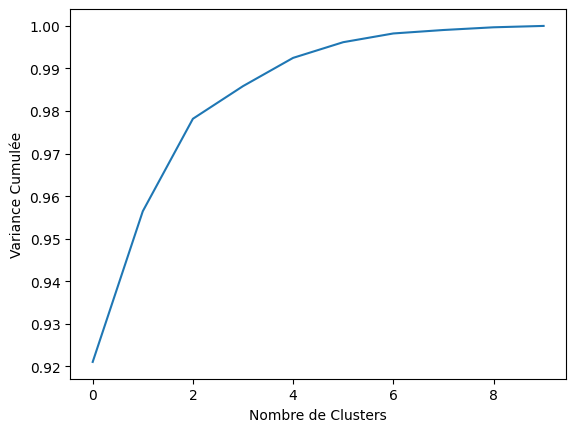

In [13]:
plt.plot(np.cumsum(variance_ratio))
plt.xlabel('Nombre de Clusters')
plt.ylabel('Variance Cumulée')
plt.show()

In [14]:
kmeans = KMeans(n_clusters= 5)
nb_cluster = 5
data = np.zeros((nb_cluster-1, 2))

In [15]:
test_5clusters = kmeans.fit(df_clean)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
for i in range(2,nb_cluster+1):
    km = KMeans(n_clusters=i)
    km.fit(df_clean)
    lab = km.labels_
    score = silhouette_score(df_clean,lab)
    data[i-2,:] = (i,score)
    print("Nombre clusters : ", i, "Score : ", score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre clusters :  2 Score :  0.5219160618666411


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre clusters :  3 Score :  0.43922267848323115


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre clusters :  4 Score :  0.3923934630929249


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nombre clusters :  5 Score :  0.3646475316043462


## eps=2 min_samples=35

In [17]:
dbscan = DBSCAN(eps=2, min_samples=35).fit(df_clean)
print(set(dbscan.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, -1}


In [18]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_clean)

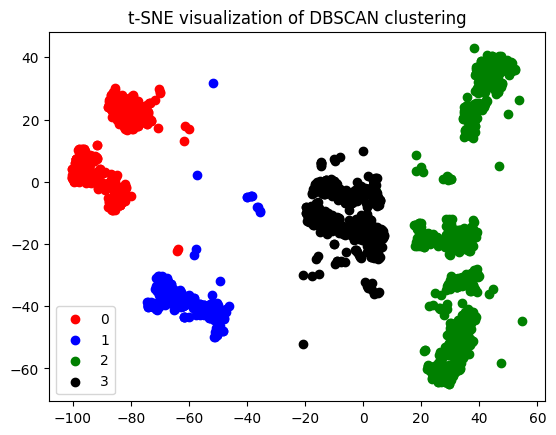

In [19]:
df_tsne1 = pd.DataFrame({'x': df_tsne[:, 0], 'y': df_tsne[:, 1], 'label': dbscan.labels_})

colors = ['red', 'blue', 'green', 'black']
for i, color in enumerate(colors):
    subset = df_tsne1[df_tsne1['label'] == i]
    plt.scatter(subset['x'], subset['y'], c=color, label=i)

plt.legend()
plt.title('t-SNE visualization of DBSCAN clustering')
plt.show()

## eps=2 min_samples=20

In [38]:
dbscan = DBSCAN(eps=2, min_samples=20).fit(df_clean)
print(set(dbscan.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}


In [39]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_clean)

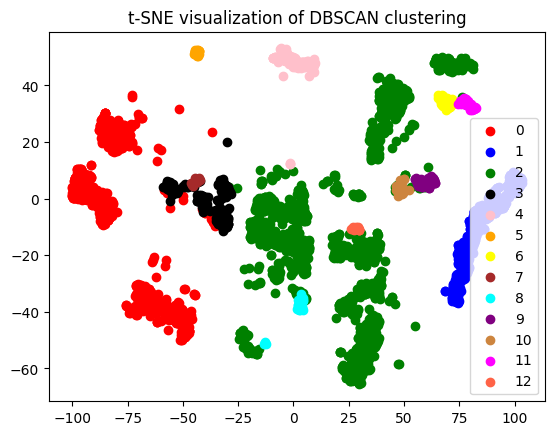

In [50]:
df_tsne1 = pd.DataFrame({'x': df_tsne[:, 0], 'y': df_tsne[:, 1], 'label': dbscan.labels_})

colors = ['red', 'blue', 'green', 'black','pink','orange','yellow','brown','cyan','purple','peru','fuchsia','tomato']
for i, color in enumerate(colors):
    subset = df_tsne1[df_tsne1['label'] == i]
    plt.scatter(subset['x'], subset['y'], c=color, label=i)

plt.legend()
plt.title('t-SNE visualization of DBSCAN clustering')
plt.show()

## eps=5 min_samples=55

In [51]:
dbscan = DBSCAN(eps=5, min_samples=55).fit(df_clean)
print(set(dbscan.labels_))

{0, -1}


In [52]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_clean)

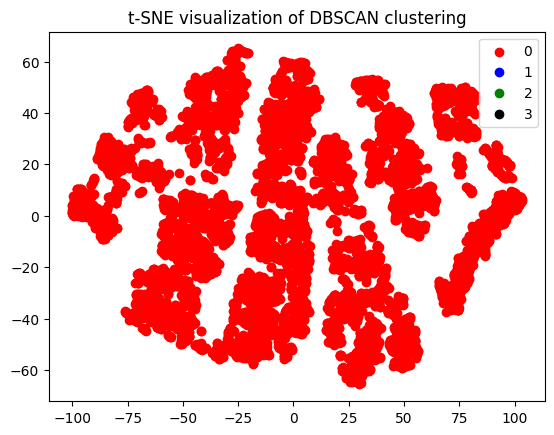

In [53]:
df_tsne1 = pd.DataFrame({'x': df_tsne[:, 0], 'y': df_tsne[:, 1], 'label': dbscan.labels_})

colors = ['red', 'blue', 'green', 'black']
for i, color in enumerate(colors):
    subset = df_tsne1[df_tsne1['label'] == i]
    plt.scatter(subset['x'], subset['y'], c=color, label=i)

plt.legend()
plt.title('t-SNE visualization of DBSCAN clustering')
plt.show()

## eps=1.5 min_samples=10

In [63]:
dbscan = DBSCAN(eps=1.5, min_samples=10).fit(df_clean)
print(set(dbscan.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1}


In [64]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_clean)

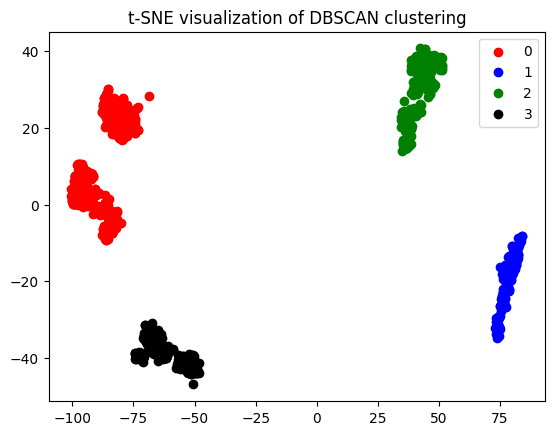

In [65]:
df_tsne1 = pd.DataFrame({'x': df_tsne[:, 0], 'y': df_tsne[:, 1], 'label': dbscan.labels_})

colors = ['red', 'blue', 'green', 'black']
for i, color in enumerate(colors):
    subset = df_tsne1[df_tsne1['label'] == i]
    plt.scatter(subset['x'], subset['y'], c=color, label=i)

plt.legend()
plt.title('t-SNE visualization of DBSCAN clustering')
plt.show()